1. Import Libraries and Load Data

In [4]:
import pandas as pd

# Adjust delimiter if needed ('|' or '\t' etc.)
# Try to infer the delimiter automatically
df = pd.read_csv('../data/MachineLearningRating_v3.txt', delimiter='|', engine='python')
df.to_parquet('../data/MachineLearningRating_v3.parquet', engine='pyarrow')  # or engine='fastparquet'#
#df = pd.read_parquet('../data/MachineLearningRating_v3.parquet', engine='pyarrow')



2. Load Parquet and Optimize

In [5]:
# Load from Parquet
df = pd.read_parquet('../data/MachineLearningRating_v3.parquet', engine='pyarrow')

# Optional: Convert object columns to category to save memory
cat_cols = ['Gender', 'Province', 'VehicleType', 'Make', 'Model']
for col in cat_cols:
    if col in df.columns:
        df[col] = df[col].astype('category')


2. Data Structure & Overview

In [6]:
# Structure & summary
print(df.info())
print(df.describe(include='all'))

# Check missing values
missing = df.isnull().sum()
print("Missing Values:\n", missing[missing > 0])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype   
---  ------                    --------------    -----   
 0   UnderwrittenCoverID       1000098 non-null  int64   
 1   PolicyID                  1000098 non-null  int64   
 2   TransactionMonth          1000098 non-null  object  
 3   IsVATRegistered           1000098 non-null  bool    
 4   Citizenship               1000098 non-null  object  
 5   LegalType                 1000098 non-null  object  
 6   Title                     1000098 non-null  object  
 7   Language                  1000098 non-null  object  
 8   Bank                      854137 non-null   object  
 9   AccountType               959866 non-null   object  
 10  MaritalStatus             991839 non-null   object  
 11  Gender                    990562 non-null   category
 12  Country                   1000098 non-null  object  
 13  Province    

3. Descriptive Statistics

In [7]:
num_cols = ['TotalPremium', 'TotalClaims', 'CustomValueEstimate']
print(df[num_cols].describe())


       TotalPremium   TotalClaims  CustomValueEstimate
count  1.000098e+06  1.000098e+06         2.204560e+05
mean   6.190550e+01  6.486119e+01         2.255311e+05
std    2.302845e+02  2.384075e+03         5.645157e+05
min   -7.825768e+02 -1.200241e+04         2.000000e+04
25%    0.000000e+00  0.000000e+00         1.350000e+05
50%    2.178333e+00  0.000000e+00         2.200000e+05
75%    2.192982e+01  0.000000e+00         2.800000e+05
max    6.528260e+04  3.930921e+05         2.655000e+07


5. Loss Ratio Analysis

In [8]:
# Overall Loss Ratio
df['LossRatio'] = df['TotalClaims'] / df['TotalPremium']
print("Overall Loss Ratio:", df['LossRatio'].mean())

# By Province, VehicleType, Gender
print(df.groupby('Province')['LossRatio'].mean().sort_values())
print(df.groupby('VehicleType')['LossRatio'].mean().sort_values())
print(df.groupby('Gender')['LossRatio'].mean().sort_values())


Overall Loss Ratio: nan
Province
Northern Cape    0.203831
Eastern Cape          inf
KwaZulu-Natal         inf
Free State            inf
Limpopo               inf
North West            inf
Western Cape          inf
Gauteng               NaN
Mpumalanga            NaN
Name: LossRatio, dtype: float64
VehicleType
Light Commercial     0.543917
Bus                       inf
Heavy Commercial          inf
Medium Commercial         inf
Passenger Vehicle         NaN
Name: LossRatio, dtype: float64
Gender
Female           inf
Male             inf
Not specified    NaN
Name: LossRatio, dtype: float64


c:\Users\try\OneDrive\Desktop\B5W3-End-to-End-Insurance-Risk-Analytics-Predictive-Modeling\.venv\Lib\site-packages\numpy\_core\_methods.py:51: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\try\AppData\Local\Temp\ipykernel_16120\360819693.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Province')['LossRatio'].mean().sort_values())
C:\Users\try\AppData\Local\Temp\ipykernel_16120\360819693.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('VehicleType')['LossRatio'].mean().sort_values())
C:\Use

6. Univariate Distributions

In [9]:
# Overall Loss Ratio
df['LossRatio'] = df['TotalClaims'] / df['TotalPremium']
print("Overall Loss Ratio:", df['LossRatio'].mean())

# By Province, VehicleType, Gender
print(df.groupby('Province')['LossRatio'].mean().sort_values())
print(df.groupby('VehicleType')['LossRatio'].mean().sort_values())
print(df.groupby('Gender')['LossRatio'].mean().sort_values())


Overall Loss Ratio: nan
Province
Northern Cape    0.203831
Eastern Cape          inf
KwaZulu-Natal         inf
Free State            inf
Limpopo               inf
North West            inf
Western Cape          inf
Gauteng               NaN
Mpumalanga            NaN
Name: LossRatio, dtype: float64
VehicleType
Light Commercial     0.543917
Bus                       inf
Heavy Commercial          inf
Medium Commercial         inf
Passenger Vehicle         NaN
Name: LossRatio, dtype: float64
Gender
Female           inf
Male             inf
Not specified    NaN
Name: LossRatio, dtype: float64


C:\Users\try\AppData\Local\Temp\ipykernel_16120\360819693.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Province')['LossRatio'].mean().sort_values())
C:\Users\try\AppData\Local\Temp\ipykernel_16120\360819693.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('VehicleType')['LossRatio'].mean().sort_values())
C:\Users\try\AppData\Local\Temp\ipykernel_16120\360819693.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future

7. Outlier Detection (Box Plots)

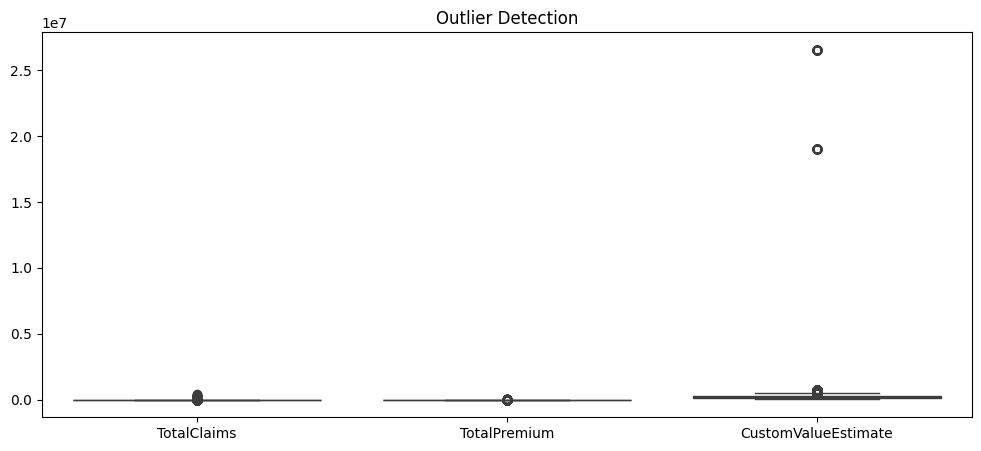

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for key financials
plt.figure(figsize=(12, 5))
sns.boxplot(data=df[['TotalClaims', 'TotalPremium', 'CustomValueEstimate']])
plt.title('Outlier Detection')
plt.show()


8. Temporal Trends

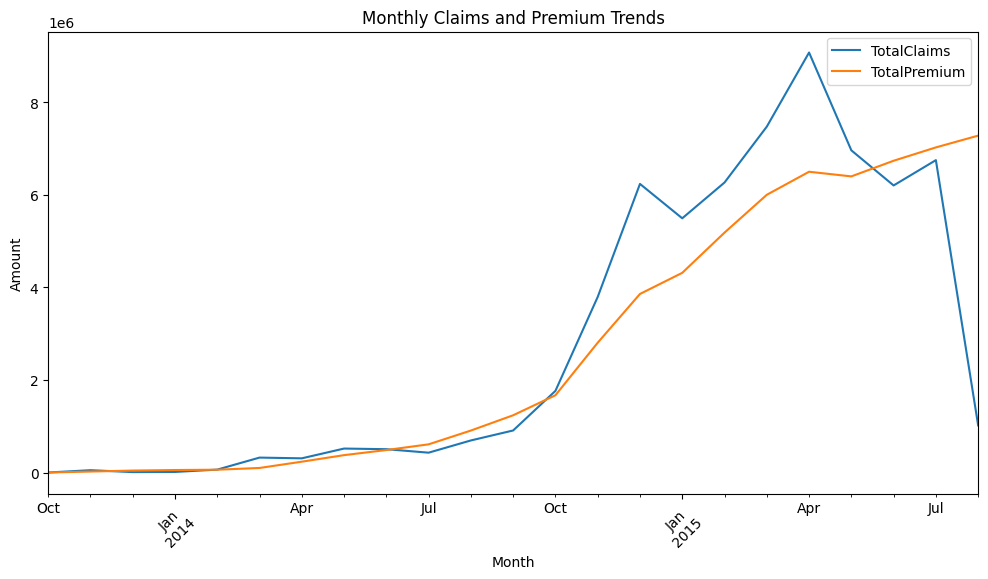

In [11]:
# Ensure date column is parsed
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'])

monthly_stats = df.groupby(df['TransactionMonth'].dt.to_period('M'))[['TotalClaims', 'TotalPremium']].sum()
monthly_stats.plot(figsize=(12, 6), title="Monthly Claims and Premium Trends")
plt.xlabel("Month")
plt.ylabel("Amount")
plt.xticks(rotation=45)
plt.show()


9. Correlation & Zipcode Analysis

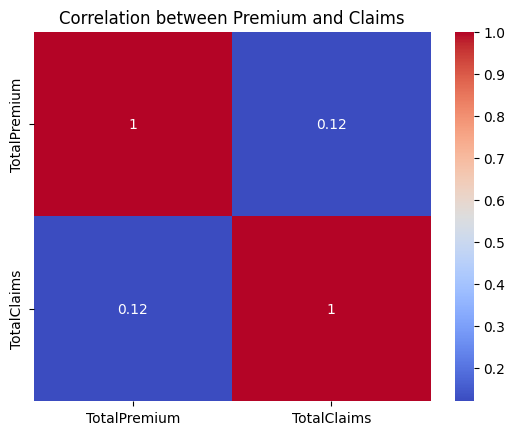

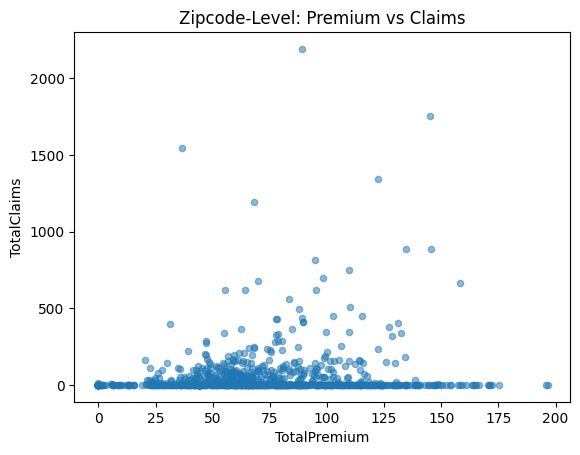

In [12]:
# Correlation matrix
corr = df[['TotalPremium', 'TotalClaims']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation between Premium and Claims")
plt.show()

# Zipcode trend
zip_trend = df.groupby('PostalCode')[['TotalPremium', 'TotalClaims']].mean()
zip_trend.plot(kind='scatter', x='TotalPremium', y='TotalClaims', alpha=0.5)
plt.title('Zipcode-Level: Premium vs Claims')
plt.show()


10. Vehicle Make/Model Insights

In [15]:
# Average claims by Make/Model
make_claims = df.groupby('make')['TotalClaims'].mean().sort_values()
model_claims = df.groupby('Model')['TotalClaims'].mean().sort_values()

print("Lowest Claim Makes:\n", make_claims.head(5))
print("Highest Claim Makes:\n", make_claims.tail(5))


Lowest Claim Makes:
 make
CITROEN                                0.0
CHERY                                  0.0
FORD                                   0.0
DAIHATSU                               0.0
GEELY                                  0.0
Name: TotalClaims, dtype: float64
Highest Claim Makes:
 make
AUDI                                   137.843083
MARCOPOLO                              156.794806
HYUNDAI                                174.215195
JMC                                    191.684795
SUZUKI                                 419.634546
Name: TotalClaims, dtype: float64


C:\Users\try\AppData\Local\Temp\ipykernel_16120\3120651811.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  model_claims = df.groupby('Model')['TotalClaims'].mean().sort_values()


11. Geographical Comparison Example

In [17]:
geo_cols = ['CoverType', 'make', 'TotalPremium']
df.groupby('Province')[geo_cols].agg({
    'CoverType': lambda x: x.mode().iloc[0] if not x.mode().empty else None,
    'make': lambda x: x.mode().iloc[0] if not x.mode().empty else None,
    'TotalPremium': 'mean'
}).sort_values('TotalPremium')


C:\Users\try\AppData\Local\Temp\ipykernel_16120\3889537560.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Province')[geo_cols].agg({


,CoverType,make,TotalPremium
Province,,,
Northern Cape,Cleaning and Removal of Accident Debris,TOYOTA,49.617253
North West,Third Party,TOYOTA,52.276258
Mpumalanga,Third Party,TOYOTA,53.801205
Western Cape,Third Party,TOYOTA,57.416793
Gauteng,Own Damage,TOYOTA,61.071115
Limpopo,Cleaning and Removal of Accident Debris,TOYOTA,61.899038
Free State,Cleaning and Removal of Accident Debris,TOYOTA,64.373780
Eastern Cape,Cleaning and Removal of Accident Debris,TOYOTA,70.546672
KwaZulu-Natal,Third Party,TOYOTA,77.800695


12. 3 Beautiful Visuals to Capture Insight

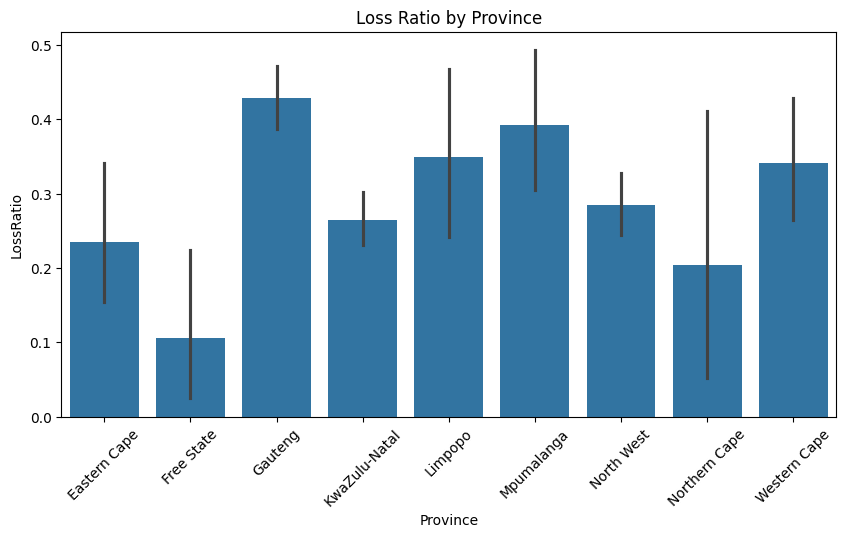

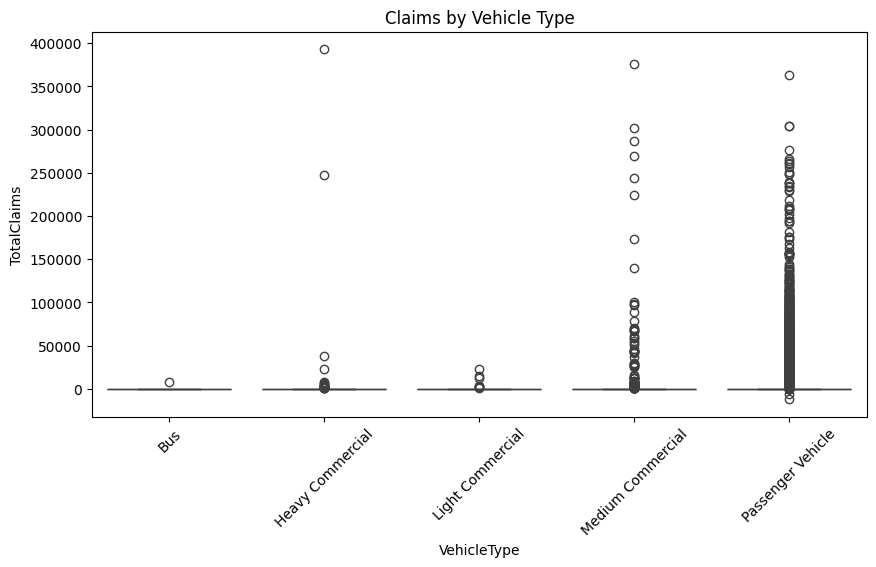

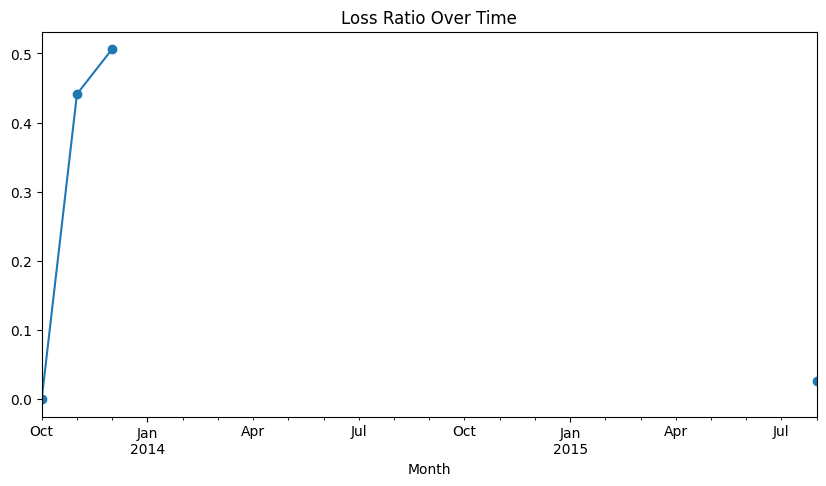

In [18]:
# 1. Loss Ratio by Province
plt.figure(figsize=(10, 5))
sns.barplot(x='Province', y='LossRatio', data=df)
plt.title('Loss Ratio by Province')
plt.xticks(rotation=45)
plt.show()

# 2. Claims Distribution by Vehicle Type
plt.figure(figsize=(10, 5))
sns.boxplot(x='VehicleType', y='TotalClaims', data=df)
plt.title('Claims by Vehicle Type')
plt.xticks(rotation=45)
plt.show()

# 3. Temporal trend of Loss Ratio
df['Month'] = df['TransactionMonth'].dt.to_period('M')
monthly_loss = df.groupby('Month')['LossRatio'].mean()
monthly_loss.plot(figsize=(10, 5), title='Loss Ratio Over Time', marker='o')
plt.show()
